# Tugas 1 Kelompok 1 Algoritma Deep Learning

4IA15
Anggota Kelompok:
1. A IAS Falah Surya Gemilang - 50421001
2. Aldo Rizky Ramadhan - 50421106
3. Faiz Rizki Azmi - 50421454
4. Muhamad Ibnu Khaidar Hafiz - 50421867
5. Siti Asma Tomu - 51421427
## Source Code yang asli bisa di cek di Github berikut:
[https://github.com/Cleign1/algoritma-deep-learning-gundar](https://github.com/Cleign1/algoritma-deep-learning-gundar)

In [1]:
import tensorflow as tf

2024-10-20 17:30:47.502690: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 17:30:47.520370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 17:30:47.541324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 17:30:47.547663: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 17:30:47.562797: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Function to preprocess the image
import requests
from PIL import Image
from io import BytesIO
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

model = tf.keras.models.load_model('model_binary_classification.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Function to make a prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    print(f'Persentase gambar dibawah ini adalah {prediction[0][0]:.2f} Pizza dan {1 - prediction[0][0]:.2f} French Fries')
    return 'Pizza' if prediction[0][0] > 0.5 else 'French Fries'


def download_image(url, save_path):
    # Check if the URL points to a JPG image
    if not url.lower().endswith('.jpg'):
        raise ValueError("The URL does not point to a JPG image.")
    
    # Download the image
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        
        # Save the image to the specified path
        img.save(save_path, 'JPEG')
        print(f"Image successfully downloaded and saved to {save_path}")
    else:
        raise Exception(f"Failed to download image. Status code: {response.status_code}")

2024-10-20 17:30:50.340056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1088 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Persentase gambar dibawah ini adalah 0.85 Pizza dan 0.15 French Fries
Kelas yang Terprediksi adalah: Pizza


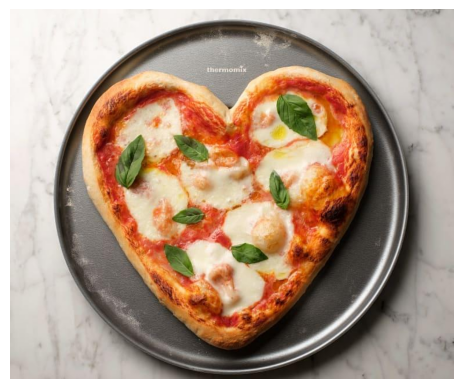

In [4]:
# url = 'https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/d6c392a84e4f665424d710649452e7f9/Derivates/a6bdb196bee23faef1d8020319c7c64750ef7686.jpg'
save_path = 'images/pizza2.jpg'
# download_image(url, save_path)
img_path = save_path
plt.imshow(image.load_img(img_path))
plt.axis('off')
result = predict_image(img_path)
print(f'Kelas yang Terprediksi adalah: {result}')